### Overview
This dataset was obtained from  https://data.world/datafiniti/mens-shoe-prices

Find interesting information in this dataset from a marketing point of view.

Marketing physical products (like shoes) requires us to find:
  - Price per unit
  - Number of units sold
These values are then used to decide price elasticity, and from that set our company's pricing policy.

This dataset has prices found for particular shoes on internet websites. It does not include the number of units sold, but can give us an idea of the price points of various competitors selling the same shoe.

In [1]:
from decouple import config
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_path = os.path.join(config('DATASETS'),
                            'mens_shoe_prices.csv')
df = pd.read_csv(dataset_path)
df.head()
# The mixed-types warning tells us we have work to do if we
# use those columns. Good we don't need them so far.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (39,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,...,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302044036,NaN,NaN,NaN
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302044036,NaN,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN


The mixed-type warning tells us we have work to do if we use those columns. Good we don't need them so far.

### Understand the dataframe columns

This involves finding out:
  - What data is available
  - How much data in each column is missing, and what should we do about it
  - Do we want to fill in missing data for any column
  - Do we need to change column dtype
All of this is done with an eye towards getting information out of the dataframe. If we don't need to use a column, there is no need to fix missing values for it.

In [3]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

Find the columns with 'price' in it's name:

In [4]:
list(filter(lambda x: 'price' in x, df.columns))
# This gives us a list of price columns we could use.

['prices_amountmin',
 'prices_amountmax',
 'prices_availability',
 'prices_color',
 'prices_condition',
 'prices_count',
 'prices_currency',
 'prices_dateadded',
 'prices_dateseen',
 'prices_flavor',
 'prices_issale',
 'prices_merchant',
 'prices_offer',
 'prices_returnpolicy',
 'prices_shipping',
 'prices_size',
 'prices_source',
 'prices_sourceurls',
 'prices_warranty']

#### Do a quick overview of the columns in the dataframe

In [11]:
def percent_na(df, colname):
    return df[colname].isna().sum() / df.shape[0]

for colname in df.columns:
    print(f'NA values in {colname:<20}: {percent_na(df, colname): .2}')

NA values in id                  :  0.0
NA values in asins               :  0.87
NA values in brand               :  0.013
NA values in categories          :  0.0
NA values in colors              :  0.43
NA values in count               :  1.0
NA values in dateadded           :  0.0
NA values in dateupdated         :  0.0
NA values in descriptions        :  0.49
NA values in dimension           :  0.85
NA values in ean                 :  0.48
NA values in features            :  0.28
NA values in flavors             :  1.0
NA values in imageurls           :  0.054
NA values in isbn                :  1.0
NA values in keys                :  0.0
NA values in manufacturer        :  0.65
NA values in manufacturernumber  :  0.22
NA values in merchants           :  0.28
NA values in name                :  0.0
NA values in prices_amountmin    :  0.00052
NA values in prices_amountmax    :  0.0
NA values in prices_availability :  0.99
NA values in prices_color        :  0.96
NA values in prices_c

We will ignore columns whose fraction of null values is high.
It looks like most of these columns are not needed anyway.

In [6]:
df.merchants.unique()[:100]

array(['[{"dateSeen":["2016-11-07T00:45:12Z"],"name":"Unbeatablesale"}]',
       '[{"dateSeen":["2016-06-14T04:29:57Z"],"name":"Sim Supply Inc"}]',
       '[{"dateSeen":["2016-05-06T14:41:57Z"],"name":"Apparelsave"}]',
       '[{"dateSeen":["2016-11-15T12:45:09Z"],"name":"Apparelsave"},{"dateSeen":["2016-11-15T12:45:09Z"],"name":"Bhfo, Inc."}]',
       '[{"dateSeen":["2016-05-03T00:00:00Z"],"name":"Panda01689 - Ebay.com"}]',
       '[{"dateSeen":["2016-08-02T04:08:25Z"],"name":"Stand Up Ranchers"}]',
       '[{"dateSeen":["2017-01-07T20:51:20Z"],"name":"Designer Studio  Inc."}]',
       '[{"dateSeen":["2016-11-10T09:32:40Z"],"name":"Walmart.com"},{"dateSeen":["2015-10-28T00:00:00Z"],"name":"Vm Innovations - Ebay.com"}]',
       '[{"dateSeen":["2016-03-27T00:00:00Z"],"name":"Tradeallday1985 - Ebay.com"}]',
       '[{"dateSeen":["2016-11-11T09:50:34Z"],"name":"Apparelsave"}]',
       '[{"dateSeen":["2017-01-12T05:26:56Z"],"name":"Apparelsave"}]',
       '[{"dateSeen":["2016-03-29T00:00:0

The merchants column looks promising. Maybe we can compare shoe prices between various merchants.

In [7]:
merchant_names = pd.Series(df.merchants.unique()).str.extract(r'name\"\:\"(.*?)\"\}').loc[:,0].unique()
merchant_names = pd.Series(merchant_names).dropna()
ebay_merchant_names = merchant_names[merchant_names.str.contains('Ebay\.com')]
len(ebay_merchant_names), len(merchant_names)

(1237, 1566)

There are 1237 ebay merchants, out of a total of 1566 unique merchants.

Are there any amazon merchants in the data?

In [8]:
amazon_merchant_names = merchant_names[merchant_names.str.contains('amazon', case=False)]
amazon_merchant_names

14         Amazon.ca
273           Amazon
403     Amazon.co.uk
1425      Amazon.com
dtype: object

Let's compare how many item types are being sold by Amazon vs. EBay

In [99]:
print(f'Number of item types sold by Amazon: {df.merchants.str.contains("amazon", case=False).sum()}')
print(f'Number of item types sold by Ebay: {df.merchants.str.contains("ebay", case=False).sum()}')

Number of item types sold by Amazon: 378
Number of item types sold by Ebay: 3926


In [107]:
for x, y in list(zip(df.merchants.values, df.prices_merchant.values))[:100]:
    print(x, y)

[{"dateSeen":["2016-11-07T00:45:12Z"],"name":"Unbeatablesale"}] nan
[{"dateSeen":["2016-11-07T00:45:12Z"],"name":"Unbeatablesale"}] UnbeatableSale - Walmart.com
[{"dateSeen":["2016-06-14T04:29:57Z"],"name":"Sim Supply Inc"}] SIM Supply Inc - Walmart.com
[{"dateSeen":["2016-06-14T04:29:57Z"],"name":"Sim Supply Inc"}] SIM Supply Inc - Walmart.com
[{"dateSeen":["2016-06-14T04:29:57Z"],"name":"Sim Supply Inc"}] SIM Supply Inc - Walmart.com
[{"dateSeen":["2016-06-14T04:29:57Z"],"name":"Sim Supply Inc"}] SIM Supply Inc - Walmart.com
[{"dateSeen":["2016-06-14T04:29:57Z"],"name":"Sim Supply Inc"}] SIM Supply Inc - Walmart.com
[{"dateSeen":["2016-06-14T04:29:57Z"],"name":"Sim Supply Inc"}] SIM Supply Inc - Walmart.com
[{"dateSeen":["2016-06-14T04:29:57Z"],"name":"Sim Supply Inc"}] SIM Supply Inc - Walmart.com
[{"dateSeen":["2016-06-14T04:29:57Z"],"name":"Sim Supply Inc"}] SIM Supply Inc - Walmart.com
[{"dateSeen":["2016-05-06T14:41:57Z"],"name":"Apparelsave"}] ApparelSave - Walmart.com
[{"dateS

In [104]:
len(df.prices_merchant.values)

19387

So almost 10x more items were on ebay compared with amazon

In [10]:
df['prices_merchant'].value_counts(normalize=True, dropna=False)
# These are the names of a list of online merchants.
# We don't need this column.

NaN                                    0.285965
ApparelSave - Walmart.com              0.103110
Sears.com                              0.045701
www.ralphlauren.com                    0.034766
UnbeatableSale.com, Inc.               0.031361
                                         ...   
topdawg_187 - Ebay.com                 0.000052
Mt.FUJI                                0.000052
2006happyface - Ebay.com               0.000052
J'colour Socks                         0.000052
Timepiece Trading LLC - Walmart.com    0.000052
Name: prices_merchant, Length: 756, dtype: float64

In [12]:
print(f'min and max: {df[["dateadded"]].min()}, {df[["dateadded"]].max()}')
print(f'min and max: {df[["dateupdated"]].min()}, {df[["dateupdated"]].max()}')
# Looks like the range is not huge - the dateadded has a 3-yr range.
# So, we can ignore inflation.

min and max: dateadded    2014-05-07T20:09:46Z
dtype: object, dateadded    2017-02-04T19:56:53Z
dtype: object
min and max: dateupdated    2016-01-02T02:38:34Z
dtype: object, dateupdated    2017-02-04T19:57:37Z
dtype: object


In [18]:
shoe_brands = df.features.str.extract(r'Brand\"\,\"value\"\:\[\"(.*?)\"\]')
print(f'Number of unique shoe brands: {shoe_brands.loc[:,0].nunique()}')
shoe_brands.loc[:,0].unique()

Number of unique shoe brands: 768


array(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', nan,
       'Twisted X', 'Lacoste', 'Generic', 'PUMA', 'Filament',
       'Robert Wayne', 'Roper', 'Puentes Denver', 'Woolrich',
       'SoftScience', 'Dr. Martens', 'Lanvin', 'Realtree', 'DC',
       'Kenneth Cole', 'Nike', 'Stacy Adams', 'Cole Haan', 'Pakems',
       'Oakley', 'Genuine Grip', "Dr. Scholl's", 'El Naturalista',
       'New Balance', 'STC', 'RBX', 'New Balance Numeric', 'SKECHERS',
       'Norcross Safety Prod', 'PRIMESOURCE, INC.', 'Medline', 'Jordan',
       'Unbranded', 'Converse', 'Kenneth Cole Reaction', 'Dvs',
       'Academie', 'Keuka SureGrip', 'Athletic Works', 'Old Friend',
       'Fitflop', 'Isotoner', 'Tretorn', 'Metro Jewelry', 'Shoe Goo',
       'TOMS', 'VANS', 'ONGUARD', 'Reebok', 'Tommy Hilfiger', 'Geox',
       'Hush Puppies', 'Alpine Swiss', 'Kenneth Cole NY', 'Gameday Boots',
       'Georgia Boot', 'Rider', 'Polo Ralph Lauren', 'Massimo Matteo',
       'PACIFIC TRAIL', 'Hunter', 'Bates'

In [19]:
# Although merchants are missing 28% of the values, we still want to see
# what their price ranges are, so we select them as well.
shoes = df[['name', 'categories', 'prices_amountmin', 'prices_amountmax', 'prices_currency', 'features', 'merchants']]

# This is necessary if we're applying a function to the dataframe's rows.
# Inside the function, we pass in a row.
# If we try to access the row.name value, it returns the index value
# of the row, rather than the name column's value.
# So don't use name as the name of a column. In this case, we're using 'description'.
shoes = shoes.rename(columns = {'name': 'description'})

shoes.merchants = shoes.merchants.str.extract(r'name\"\:\"(.*?)\"\}')

shoes['brands'] = shoes.features.str.extract(r'Brand\"\,\"value\"\:\[\"(.*?)\"\]').loc[:, 0].str.lower()
print(f'Number of unique shoe brands: {shoes.brands.nunique()}') # Looks like we lost some brand names
                                                                 # after we lowercased the names.
                                                                 # Some brands must have had uppercase and lowercase
                                                                 # names.

shoes.head()

Number of unique shoe brands: 744


,description,categories,prices_amountmin,prices_amountmax,prices_currency,features,merchants,brands
0,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...","Clothing,Shoes,Men's Shoes,All Men's Shoes",39.89,39.89,USD,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",Unbeatablesale,josmo
1,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...","Clothing,Shoes,Men's Shoes,All Men's Shoes",51.99,51.99,USD,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",Unbeatablesale,josmo
2,Servus By Honeywell Shoe Studs Zsr101blmlg,"All Men's Shoes,Shoes,Men's Shoes,Clothing",40.02,40.02,USD,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",Sim Supply Inc,servus by honeywell
3,Servus By Honeywell Shoe Studs Zsr101blmlg,"All Men's Shoes,Shoes,Men's Shoes,Clothing",50.31,50.31,USD,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",Sim Supply Inc,servus by honeywell
4,Servus By Honeywell Shoe Studs Zsr101blmlg,"All Men's Shoes,Shoes,Men's Shoes,Clothing",46.26,46.26,USD,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",Sim Supply Inc,servus by honeywell


In [20]:
shoes.shape

(19387, 8)

In [21]:
shoes.prices_currency.value_counts(dropna=False, normalize=True)
# 95% of the currency is USD. Let's stick with it

USD                                                   0.955486
AUD                                                   0.017434
CAD                                                   0.015629
EUR                                                   0.005519
NaN                                                   0.003920
GBP                                                   0.001135
UnbeatableSale.com, Inc. - Walmart.com                0.000155
PalmBeach Jewelry - Walmart.com                       0.000155
New with box                                          0.000155
new                                                   0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000103
SHOEBACCA LTD. - Walmart.com                          0.000052
Shoes.com                                             0.000052
New without tags                                      0.000052
Name: prices_currency, dtype: float64

In [22]:
shoes = shoes[shoes.prices_currency == 'USD']
shoes.shape

(18524, 8)

In [23]:
# Now that we have a dataframe with only USD currency,
# we can remove the prices_currency column
shoes = shoes.drop('prices_currency', axis=1)
shoes.head()

,description,categories,prices_amountmin,prices_amountmax,features,merchants,brands
0,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...","Clothing,Shoes,Men's Shoes,All Men's Shoes",39.89,39.89,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",Unbeatablesale,josmo
1,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...","Clothing,Shoes,Men's Shoes,All Men's Shoes",51.99,51.99,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",Unbeatablesale,josmo
2,Servus By Honeywell Shoe Studs Zsr101blmlg,"All Men's Shoes,Shoes,Men's Shoes,Clothing",40.02,40.02,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",Sim Supply Inc,servus by honeywell
3,Servus By Honeywell Shoe Studs Zsr101blmlg,"All Men's Shoes,Shoes,Men's Shoes,Clothing",50.31,50.31,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",Sim Supply Inc,servus by honeywell
4,Servus By Honeywell Shoe Studs Zsr101blmlg,"All Men's Shoes,Shoes,Men's Shoes,Clothing",46.26,46.26,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",Sim Supply Inc,servus by honeywell


In [24]:
shoes[['description']] # Take a look at how descriptive the name is.
# The 2 through 4 index shoes are not shoes - they're shoe studs.

,description
0,"Josmo 8190 Plain Infant Walking Shoes, Navy - ..."
1,"Josmo 8190 Plain Infant Walking Shoes, Navy - ..."
2,Servus By Honeywell Shoe Studs Zsr101blmlg
3,Servus By Honeywell Shoe Studs Zsr101blmlg
4,Servus By Honeywell Shoe Studs Zsr101blmlg
...,...
19382,New Xray Hester Men's Lace Up Boots - Black - ...
19383,Fila Men's Original Tennis Navy/white/gold Fas...
19384,Seek Optics New Seek Polarized Replacement Len...
19385,Seek Optics New Seek Polarized Replacement Len...


In [25]:
shoes.loc[19384] # This cannot be a shoe (from it's description)
# It looks like it is sunglasses.
# So this dataset contains things other than shoes.
# We will have to find out how to extract shoes from it.

description         Seek Optics New Seek Polarized Replacement Len...
categories          Women's Sunglasses,Sunglasses,Bags & Accessori...
prices_amountmin                                                32.48
prices_amountmax                                                32.48
features            [{"key":"Gender","value":["Unisex"]},{"key":"F...
merchants                                                         NaN
brands                                                            NaN
Name: 19384, dtype: object

In [26]:
# Let's see how many of the names have "shoes" or related in them
shoe_or_boot = shoes.description.str.contains("shoe", case=False) | \
                shoes.description.str.contains("boot", case=False) | \
                shoes.description.str.contains("loafer", case=False) | \
                shoes.description.str.contains("sneaker", case=False) | \
                shoes.description.str.contains("trainer", case=False) | \
                shoes.description.str.contains("step", case=False) | \
                shoes.description.str.contains("oxford", case=False) | \
                shoes.description.str.contains("canvas", case=False)

                # We should not consider slippers, sandals, etc as shoes.
                # If we want, we could look at them as well,
                # to see the price ranges of each type of footwear.
                # shoes.description.str.contains("sandal", case=False) | \
                # shoes.description.str.contains("slipper", case=False) | \
                # shoes.description.str.contains("croc", case=False)

print(f'Fraction of names containing shoes: {len(shoes[shoe_or_boot]) / shoes.shape[0]}')
# Half of the dataset items do not have anything to do with shoes

Fraction of names containing shoes: 0.510310947959404


In [27]:
# Let's see what those other items are
other_than_shoes = shoes[~shoe_or_boot][['description']].squeeze().values

In [28]:
other_than_shoes[100:200]

array(['Carrera 90/s Sunglasses', 'Carrera 90/s Sunglasses',
       'Carrera 90/s Sunglasses', 'Carrera 90/s Sunglasses',
       'Carrera 90/s Sunglasses', 'Carrera 90/s Sunglasses',
       'Carrera 90/s Sunglasses', 'Carrera 90/s Sunglasses',
       'Carrera 90/s Sunglasses', 'Carrera 90/s Sunglasses',
       'Carrera 90/s Sunglasses', 'Carrera 90/s Sunglasses',
       'Carrera 90/s Sunglasses', 'Carrera 90/s Sunglasses',
       'Carrera 90/s Sunglasses', 'Carrera 90/s Sunglasses',
       'Carrera 90/s Sunglasses', 'Carrera 90/s Sunglasses',
       'Carrera 90/s Sunglasses', 'Carrera 90/s Sunglasses',
       'Carrera 90/s Sunglasses', 'Carrera 90/s Sunglasses',
       "Dockers Men's 810093 Comfort Waistband Khaki Flat Front D3 Black W38 X L34",
       "Brioni Men's Blazer Jacket 1011palv-4257",
       "Brioni Men's Blazer Jacket 1011palv-4257",
       'Fuse Lenses For Electric Gauge Brown Tint Replacement Lenses',
       'Fuse Lenses For Electric Gauge Brown Tint Replacement Lenses',


In [29]:
# Compare shoe names to categories
cat_other_than_shoes = shoes[~shoe_or_boot][['categories']].squeeze().values
other_than_shoes_names_cat = list(zip(other_than_shoes, cat_other_than_shoes))

In [30]:
other_than_shoes_names_cat[:100]
# This tells us that we cannot use categories to extract shoes from this dataset.
# So our use of name to extract shoes is valid.
# In fact, categories does not give us anything, so remove it to save
# processing time/memory.

[('Maui and Sons David Men  Open Toe Synthetic  Flip Flop Sandal',
  "All Men's Shoes,Shoes,Men's Shoes,Clothing"),
 ('Maui and Sons David Men  Open Toe Synthetic  Flip Flop Sandal',
  "All Men's Shoes,Shoes,Men's Shoes,Clothing"),
 ('Maui and Sons David Men  Open Toe Synthetic  Flip Flop Sandal',
  "All Men's Shoes,Shoes,Men's Shoes,Clothing"),
 ('Maui and Sons David Men  Open Toe Synthetic  Flip Flop Sandal',
  "All Men's Shoes,Shoes,Men's Shoes,Clothing"),
 ('Maui and Sons David Men  Open Toe Synthetic  Flip Flop Sandal',
  "All Men's Shoes,Shoes,Men's Shoes,Clothing"),
 ('Rubies Costume Adult Mens Regency Plush Santa Claus Christmas Suit | X-large',
  "Men's Halloween Costumes,Adult Halloween Costumes,Clothing, Shoes & Accessories,Halloween,Men,Costumes, Reenactment, Theater,All Costumes,Costumes,Party & Occasions"),
 ('Rubies Costume Adult Mens Regency Plush Santa Claus Christmas Suit | X-large',
  "Men's Halloween Costumes,Adult Halloween Costumes,Clothing, Shoes & Accessories,Ha

In [31]:
shoes = shoes.drop('categories', axis='columns')
shoes.head()

,description,prices_amountmin,prices_amountmax,features,merchants,brands
0,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",Unbeatablesale,josmo
1,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",Unbeatablesale,josmo
2,Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",Sim Supply Inc,servus by honeywell
3,Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",Sim Supply Inc,servus by honeywell
4,Servus By Honeywell Shoe Studs Zsr101blmlg,46.26,46.26,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",Sim Supply Inc,servus by honeywell


In [32]:
print(f'Initial shoes shape: {shoes.shape}')
shoes = shoes.dropna(axis='index', how='any') # Drop any row that has NA values in it
print(f'Final shoes shape: {shoes.shape}')
# There are no nulls in our data

Initial shoes shape: (18524, 6)
Final shoes shape: (8903, 6)


In [33]:
shoes.dtypes

description         object
prices_amountmin    object
prices_amountmax    object
features            object
merchants           object
brands              object
dtype: object

In [34]:
# Convert prices to floats
shoes.prices_amountmin = shoes.prices_amountmin.astype('float64')
shoes.prices_amountmax = shoes.prices_amountmax.astype('float64')

In [35]:
shoes.dtypes

description          object
prices_amountmin    float64
prices_amountmax    float64
features             object
merchants            object
brands               object
dtype: object

In [36]:
diff_amounts = shoes[shoes.prices_amountmin != shoes.prices_amountmax]
diff_amounts.shape[0]
# Only a very small number of columns have differing minimum and maximum amounts

39

In [37]:
shoes2 = pd.DataFrame({'price_diff': (shoes.prices_amountmax - shoes.prices_amountmin),
                       'amountmin': shoes.prices_amountmin,
                       'amountmax': shoes.prices_amountmax})
shoes2.sort_values('price_diff', ascending=False).head()

,price_diff,amountmin,amountmax
10737,230.00,69.99,299.99
11780,225.10,66.90,292.00
11771,225.10,66.90,292.00
11776,221.92,70.08,292.00
11769,200.59,91.41,292.00


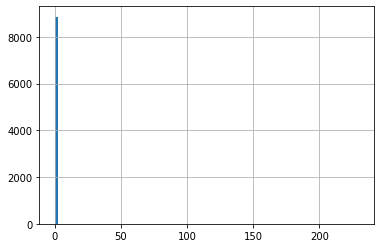

In [38]:
shoes2.price_diff.hist(bins=100);

In [39]:
print(f'% of price differences that are zero: {len(shoes2[shoes2.price_diff < 0.01]) / len(shoes2)}')

% of price differences that are zero: 0.9956194541165899


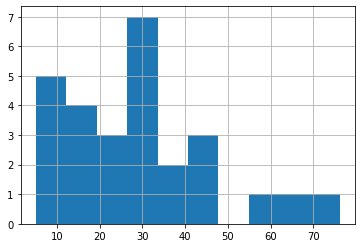

In [40]:
shoes2[(shoes2.price_diff > 0.01) & \
       (shoes2.price_diff < 80)].price_diff.hist();
# Huh! Seems to be some kind of pattern.
# This is the pattern I see going upto $80 with default number of bins.
#   0-8:   Low
#   9-16:  High
#   17-24: Much lower
# The $8 per column makes since since the default number of bins = 10,
# and we're looking at values from 0 - 80.
# It also makes sense that the histogram should decrease to the right,
# since we don't have as many higher values.
# The pattern does change as you go from 0 - 100,
# and change the number of bins.
# So maybe there is nothing here.
# Our minds try to notice patterns all the time.

In [41]:
# Remove the shoes2 dataframe.
del shoes2

In [42]:
df.features.loc[0]

'[{"key":"Gender","value":["Men"]},{"key":"Shoe Size","value":["M"]},{"key":"Shoe Category","value":["Men\'s Shoes"]},{"key":"Color","value":["Multicolor"]},{"key":"Manufacturer Part Number","value":["8190-W-NAVY-7.5"]},{"key":"Brand","value":["Josmo"]}]'

In [43]:
shoes['categories'] = shoes.features.str.extract(r'Shoe Category\"\,\"value\"\:\[\"(.*?)\"\]').squeeze()
shoes.categories.value_counts(normalize=True, ascending=False)

Men's Shoes                          0.640565
Mens Shoes                           0.088400
Men'S Shoes                          0.026924
Unisex Shoes                         0.024456
Adult                                0.023783
                                       ...   
Flip Flops                           0.000224
Active Sandals                       0.000224
women                                0.000224
One Size                             0.000224
Athletic & Sneakers","Men's Shoes    0.000224
Name: categories, Length: 104, dtype: float64

In [44]:
cat_list = pd.Series(shoes.categories.unique())
cat_list = cat_list.str.replace('\'', '')
print(f'% NaN in shoes categories: {shoes.categories.isnull().sum() / len(shoes)}')
# Since there are so many NaN values,
# maybe we can use the categories feature instead.

% NaN in shoes categories: 0.4993822307087499


In [45]:
df.categories.value_counts(normalize=True, ascending=False)
# The category names combine clothing and shoes etc.
# It doesn't look like a good way to judge what the item is.
# We will stick with our categories based on shoe category
# from the features column.

All Men's Shoes,Shoes,Men's Shoes,Clothing                                                                                    0.191726
Clothing,Shoes,Men's Shoes,All Men's Shoes                                                                                    0.084799
Men's Casual Shoes,Shoes,Men's Shoes,Clothing                                                                                 0.036055
All Men's Clothing,Men's Clothing,Men's Outerwear,Clothing, Shoes & Jewelry,Clothing                                          0.030330
Clothing, Shoes & Accessories,Men's Shoes,Athletic                                                                            0.020632
                                                                                                                                ...   
All Action Sports,Outlet,Shoes Outlet,All Shoes,Men's Shoes,Action Sports Outlet                                              0.000052
Shoes,Clothing, Shoes & Jewelry,Men,Sandals            

In [46]:
# Let's check what items have a feature with NaN
# as the shoe category. Maybe they're not shoes.
shoe_categories_nan_names = shoes[shoes.categories.isnull()].description.unique()
shoe_categories_nan_names

array(['Servus By Honeywell Shoe Studs Zsr101blmlg',
       'Native Miller Men Us 10 Gray Loafer Uk 9 Eu 43',
       'Rubies Costume Adult Mens Regency Plush Santa Claus Christmas Suit | X-large',
       ..., 'Sanuk Vagabond Chill   Moc Toe Canvas  Loafer',
       'Tretorn Racket H Low Men  Round Toe Canvas Blue Sneakers',
       'Stacy Adams Tremain Men  Round Toe Suede  Oxford'], dtype=object)

In [47]:
# Looks like we missed some shoes that do not have their
# categories labeled in the features column.
# If the category is not labeled, we can check the name
# for the type and create a category using the same type:
# Let's consider the types based on the values in our mapping table below.

# Since we're only considering mens shoes, ignore the rest
ignore_categories = ['girl', 'no category', 'pumps', 'baby', 
                     'youth', 'unisex', 'children']
shoes_not_null = shoes[shoes.categories.notnull()]
ignore_idx = []
for cat in ignore_categories:
    ignore_idx.extend(shoes_not_null[shoes_not_null.categories.str.contains(cat, case=False)].index)
print(f'ignore_idx: {ignore_idx}')

shoes_required = shoes.drop(ignore_idx)  # Only shoes with categories we want
mapping = {   # Unusual shoe types are at the top since a shoe name may contain 'cleated shoe',
              # which matches both cleated and shoe. But we want to use the more precise label,
              # and we will search for those precise labels first.
              # Once it is found, and replaced, we don't compare any further.
            'cleated': 'cleated', 
            'spiked': 'cleated',
            'running': 'running',
            'athletic': 'athletic',
            'training': 'trainer',
            'trainer': 'trainer',
            'step': 'step',
            'skate': 'skate',
            'waterproof boot': 'waterproof boot',
            'skateboarding': 'skateboarding',

            'boat': 'boat',
            'water': 'boat',
            'winter and rain boot': 'winter and rain boot',
            'basketball': 'basketball',
            'oxford': 'oxford',
            'dress': 'dress',
            'fashion': 'dress',
            'dress boot': 'dress boot',
            'leather boot': 'leather boot',
            'work boot': 'work boot',

            'boot': 'boot',
            'casual': 'casual',
            'lifestyle': 'casual',
            'loafer': 'casual',
            'slip-on': 'casual',
            'hiking': 'hiking',
            'slipper': 'slipper',
            'sliipper': 'slipper',
            'flat': 'slipper',
            'flip flop': 'slipper',
            'sandal': 'sandal',
            'sneaker': 'sneaker',
            'shoe': 'shoe',
         }

# We don't need the features column any more
shoes_required = shoes_required.drop('features', axis=1)

shoes_required

ignore_idx: [158, 418, 636, 637, 703, 704, 758, 1192, 2159, 2160, 2599, 2746, 3491, 4936, 5609, 5610, 6178, 6633, 6736, 7909, 8147, 8148, 8321, 8699, 8700, 9822, 11210, 11211, 11688, 11689, 11690, 11691, 11692, 11693, 12989, 12990, 13047, 13050, 13120, 13121, 13122, 13302, 13303, 13444, 14211, 14703, 16171, 16172, 17018, 17019, 17020, 17021, 17022, 17023, 17024, 17328, 17329, 18037, 18515, 18516, 18517, 18728, 815, 8670, 9120, 9121, 10319, 10320, 2119, 2120, 6468, 16376, 16377, 138, 139, 140, 141, 142, 138, 139, 140, 141, 142, 990, 2063, 2064, 2198, 2385, 2386, 2390, 2408, 2447, 2448, 2604, 2605, 2753, 2769, 2770, 2771, 2772, 2857, 2907, 2908, 2909, 2910, 2911, 2912, 3304, 3305, 3306, 3551, 3608, 3692, 3896, 3897, 3898, 3899, 3915, 3916, 3917, 3918, 4320, 4391, 4594, 4864, 4865, 4866, 4867, 4868, 4869, 4870, 4871, 4872, 4955, 4956, 4957, 4958, 4959, 4960, 5317, 5348, 5451, 5589, 5590, 5591, 5592, 5593, 5595, 5769, 5804, 5904, 6352, 6516, 6524, 6525, 6903, 6904, 7046, 7047, 7499, 7500, 

,description,prices_amountmin,prices_amountmax,merchants,brands,categories
0,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,Unbeatablesale,josmo,Men's Shoes
1,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,Unbeatablesale,josmo,Men's Shoes
2,Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,Sim Supply Inc,servus by honeywell,NaN
3,Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,Sim Supply Inc,servus by honeywell,NaN
4,Servus By Honeywell Shoe Studs Zsr101blmlg,46.26,46.26,Sim Supply Inc,servus by honeywell,NaN
...,...,...,...,...,...,...
19374,Easy Usa M8818 Men Slide Sport Sandals - 36 Pairs,168.60,168.60,Unbeatablesale,easy usa,Men's Shoes
19375,Easy Usa M8818 Men Slide Sport Sandals - 36 Pairs,129.59,129.59,Unbeatablesale,easy usa,Men's Shoes
19380,Roper Western Shoes Mens Wide Slip On Brown 09...,34.99,34.99,Apparelsave,roper,Men's Shoes
19381,Roper Western Shoes Mens Wide Slip On Brown 09...,94.00,94.00,Apparelsave,roper,Men's Shoes


In [48]:
mapping_keys = mapping.keys()
mapping_values = mapping.values()

def update_categories(x):
    # Here x is a series of column values for a row.
    if pd.notna(x.categories):
        return x.categories
    
    for key in mapping_keys:
        if key in x.description.lower():
            return mapping[key]

shoes_required.categories = shoes_required.apply(update_categories, axis=1)
shoes_required

,description,prices_amountmin,prices_amountmax,merchants,brands,categories
0,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,Unbeatablesale,josmo,Men's Shoes
1,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,Unbeatablesale,josmo,Men's Shoes
2,Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,Sim Supply Inc,servus by honeywell,shoe
3,Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,Sim Supply Inc,servus by honeywell,shoe
4,Servus By Honeywell Shoe Studs Zsr101blmlg,46.26,46.26,Sim Supply Inc,servus by honeywell,shoe
...,...,...,...,...,...,...
19374,Easy Usa M8818 Men Slide Sport Sandals - 36 Pairs,168.60,168.60,Unbeatablesale,easy usa,Men's Shoes
19375,Easy Usa M8818 Men Slide Sport Sandals - 36 Pairs,129.59,129.59,Unbeatablesale,easy usa,Men's Shoes
19380,Roper Western Shoes Mens Wide Slip On Brown 09...,34.99,34.99,Apparelsave,roper,Men's Shoes
19381,Roper Western Shoes Mens Wide Slip On Brown 09...,94.00,94.00,Apparelsave,roper,Men's Shoes


In [49]:
# Notice that the values of the updated dataframe above shows
# 'Servus By Honeywell Shoe Studs Zsr101blmlg' as the description
# of the item, but we update the categories column to shoe.
# That is because we find 'shoe' in the description of that item.
# This cannot be helped - we can do a better job by removing those
# values by hand. If we were working on this as real data for
# a real company, we would definitely have to do that.
# For now, we will ignore it

In [50]:
# The copy() is done to prevent a setting-from-copy warning.
# This warning means that a view could have been created on the 
# dataframe, and updates to it could update the view, and
# not the actual dataframe. So if you refer to the dataframe
# thinking it has been updated, you will be surprised.
# To prevent surprises, the copy() function will create a
# separate copy of the shoes_required dataframe.
shoes_required = shoes_required[shoes_required.categories.notna()].copy()
shoes_required.shape[0]

8006

In [51]:
def update_values(x):
    for search_value in mapping_values:
        if search_value in x.categories:
            return search_value
    
shoes_required.categories = shoes_required.apply(update_values, axis=1)    
shoes_required.categories.unique()

array([None, 'shoe', 'casual', 'sneaker', 'skate', 'running', 'boot',
       'oxford', 'slipper', 'work boot', 'trainer', 'boat',
       'waterproof boot', 'athletic', 'dress', 'hiking', 'basketball',
       'sandal', 'step', 'leather boot', 'cleated'], dtype=object)

In [52]:
shoes_required.groupby('categories').describe()

prices_amountmin                                           \
                           count        mean         std    min       25%   
categories                                                                  
athletic                    62.0   79.169516   32.701870  21.99   65.1850   
basketball                  70.0   95.550857   55.853476  33.99   59.2400   
boat                       151.0   66.310861   50.011138  12.99   31.9900   
boot                       700.0  116.836186  116.930870   0.00   49.9650   
casual                     319.0  100.435862  110.002959   6.99   41.4900   
cleated                      3.0  126.910000   95.153924  17.29   96.2700   
dress                       90.0   60.885333   30.473840  15.99   37.2475   
hiking                      23.0   72.280435   33.885940  18.99   53.4900   
leather boot                 7.0  120.330000   19.131012  97.99  108.2950   
oxford                     248.0  110.967177  131.423630   3.99   56.7325   
running                    233.0   79.676009   35.317635   9.98   54.9900   
sandal                     147.0   72.791156   77.348728   6.99   31.4700   
shoe                       297.0   71.286936   64.557330   7.99   45.9500   
skate                      107.0   45.954579   18.899842  11.99   30.9900   
slipper                    386.0   43.295130   75.599814   2.86   18.9900   
sneaker                    673.0   69.963938   53.518397   7.99   38.9900   
step                        18.0   87.456667   82.565412  29.94   43.2400   
trainer                     62.0   70.096774   25.323706  23.99   52.4675   
waterproof boot             28.0  127.731786   57.256868  32.98  105.8100   
work boot                  273.0  131.623956   54.287921  19.99   89.2700   

                                            prices_amountmax              \
                     50%       75%      max            count        mean   
categories                                                                 
athletic          68.580   85.9675   165.00             62.0   79.169516   
basketball        80.000  113.7425   340.00             70.0   95.550857   
boat              45.000   94.1800   350.00            151.0   66.310861   
boot              91.350  150.0000  1275.00            700.0  116.836186   
casual            67.980  110.0000   695.00            319.0  100.435862   
cleated          175.250  181.7200   188.19              3.0  126.910000   
dress             60.000   77.2500   180.00             90.0   60.885333   
hiking            65.000   89.4950   150.00             23.0   72.280435   
leather boot     117.840  129.9700   149.95              7.0  120.330000   
oxford            85.000  120.9975  1149.00            248.0  110.967177   
running           71.990  101.9900   215.00            233.0   80.663133   
sandal            47.980   86.4850   450.00            147.0   72.791156   
shoe              54.990   83.3200   554.88            297.0   71.286936   
skate             45.000   59.9850   115.00            107.0   45.954579   
slipper           23.995   40.0000  1165.00            386.0   43.295130   
sneaker           60.000   80.0000   595.00            673.0   70.030862   
step              66.190   96.7425   395.00             18.0   87.456667   
trainer           66.985   79.7525   160.00             62.0   70.096774   
waterproof boot  117.905  128.4475   275.95             28.0  127.731786   
work boot        139.950  167.4700   283.24            273.0  131.623956   

                                                                          
                        std    min       25%      50%       75%      max  
categories                                                                
athletic          32.701870  21.99   65.1850   68.580   85.9675   165.00  
basketball        55.853476  33.99   59.2400   80.000  113.7425   340.00  
boat              50.011138  12.99   31.9900   45.000   94.1800   350.00  
boot             116.930870   0.00   49.9650 

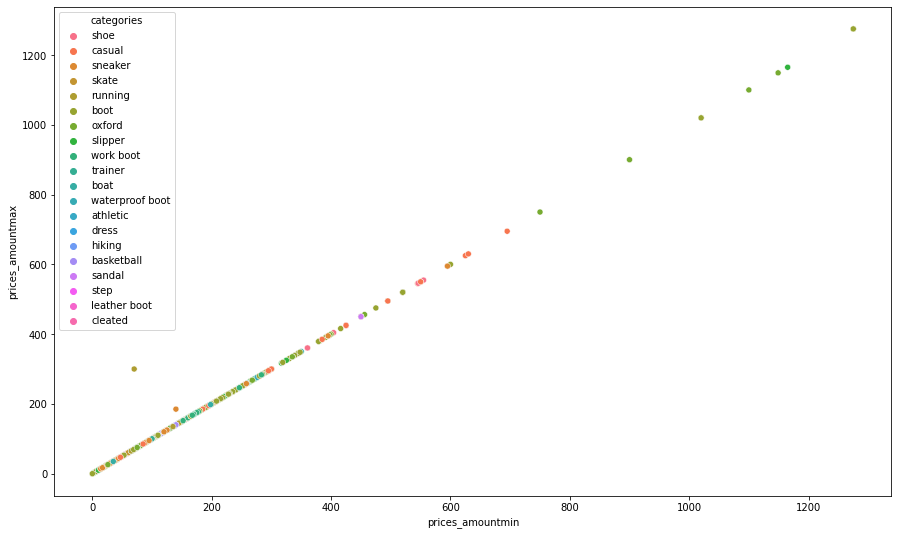

In [53]:
# There is a large difference between the min and max values for each category.
# Also, some max values are very high (2900 for boots, 2800 for oxfords),
# while some max values are low (124 for skating) shoes.
# We should use a log-log scatter plot colored by categories
# to allow us to see all data on one chart.
import seaborn as sns
fig = plt.figure(figsize=(15, 9))
sns.scatterplot(x='prices_amountmin', y='prices_amountmax',
                data=shoes_required, 
                hue='categories');

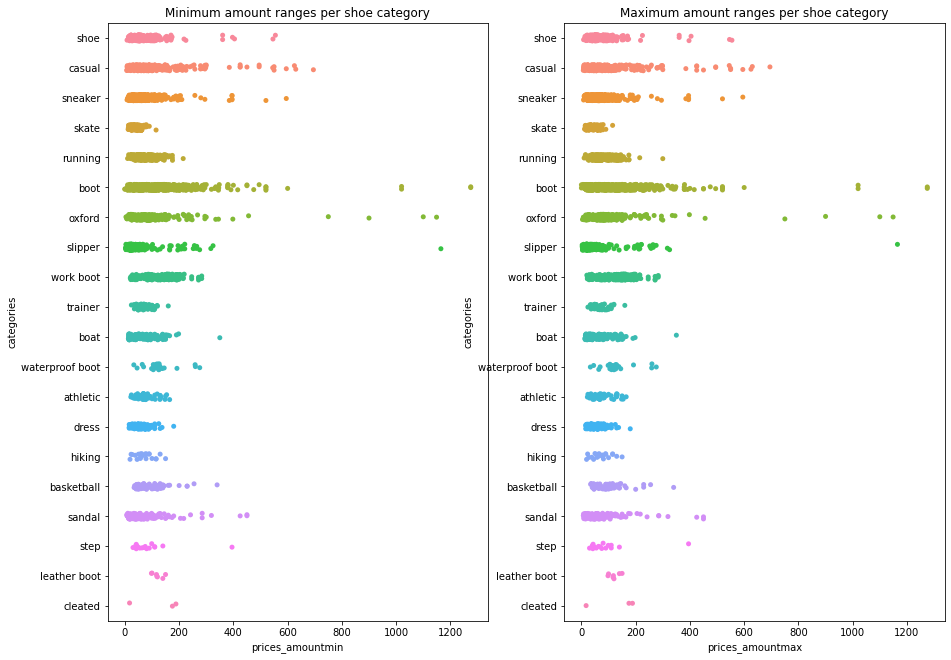

In [54]:
# The single diagonal line in the plot above is due to
# the prices_amountmin and prices_amountmax being the same.

# It's still very difficult to see the relationships between prices
# for each type of shoe. Let's try a stripplot.
fig, axes = plt.subplots(1, 2, figsize=(15, 11))
# fig.suptitle('Prices per shoe category')
axes[0].set_title('Minimum amount ranges per shoe category')
axes[1].set_title('Maximum amount ranges per shoe category')
sns.stripplot(ax=axes[0], x='prices_amountmin', y='categories', data=shoes_required);
sns.stripplot(ax=axes[1], x='prices_amountmax', y='categories', data=shoes_required);
# It's better, but we cannot compare the min/max prices.

In [55]:
# This is a little better, but we cannot compare the min/max
# prices for a category.
# Let's create a different dataframe where there is only one price column.
# An additional column (price_type) will tell us if this is a min/max price.
# This will allow us to show both min/max prices per category
# next to each other.
df2 = pd.DataFrame(data={'description': shoes_required.description,
                         'prices': shoes_required.prices_amountmin,
                         'categories': shoes_required.categories,
                         'brands': shoes_required.brands,
                         'price_type': ['min']*len(shoes_required)})
df3 = pd.DataFrame(data={'description': shoes_required.description,
                         'prices': shoes_required.prices_amountmax,
                         'categories': shoes_required.categories,
                         'brands': shoes_required.brands,
                         'price_type': ['max']*len(shoes_required)})
shoes_alt = pd.concat([df2, df3], axis=0, join='outer', ignore_index=True)
shoes_alt.tail()

,description,prices,categories,brands,price_type
16007,Easy Usa M8818 Men Slide Sport Sandals - 36 Pairs,168.60,None,easy usa,max
16008,Easy Usa M8818 Men Slide Sport Sandals - 36 Pairs,129.59,None,easy usa,max
16009,Roper Western Shoes Mens Wide Slip On Brown 09...,34.99,None,roper,max
16010,Roper Western Shoes Mens Wide Slip On Brown 09...,94.00,None,roper,max
16011,Fila Men's Original Tennis Navy/white/gold Fas...,64.95,None,fila,max


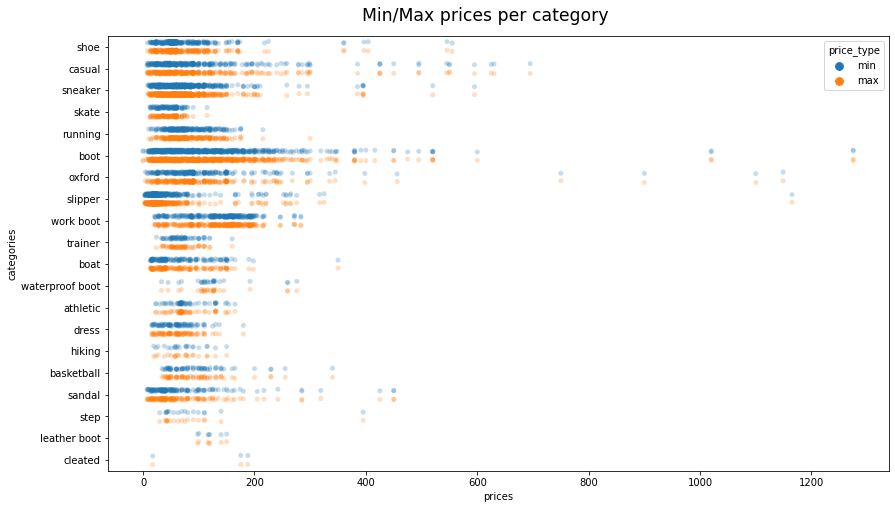

In [95]:
fig = plt.figure(figsize=(14, 8))
fig.suptitle('Min/Max prices per category', 
             y=0.93,
             fontsize='xx-large')
sns.stripplot(data=shoes_alt, x='prices', y='categories', 
              jitter=True,
              hue='price_type', dodge=True, # dodge = True separates points for each hue type.
                                            # This is how we get two rows per price type.
              alpha=0.25);

In [57]:
# Looks like the min/max prices are close together for almost all of the items.
# There are some large prices in the boot and oxford categories.
# Also, leather boots and skates have short price ranges.
# Casual and boots have longer price ranges.

In [58]:
shoes.head()

,description,prices_amountmin,prices_amountmax,features,merchants,brands,categories
0,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",Unbeatablesale,josmo,Men's Shoes
1,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",Unbeatablesale,josmo,Men's Shoes
2,Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",Sim Supply Inc,servus by honeywell,NaN
3,Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",Sim Supply Inc,servus by honeywell,NaN
4,Servus By Honeywell Shoe Studs Zsr101blmlg,46.26,46.26,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",Sim Supply Inc,servus by honeywell,NaN


In [59]:
shoes.brands.value_counts(normalize=True, ascending=False)
# Nike and Puma are leading in the number of items listed.
# Let's compare the price ranges of these two brands.

nike              0.070538
puma              0.061889
vans              0.037852
new balance       0.035269
reebok            0.025946
                    ...   
coronado          0.000112
smoky             0.000112
wood n' stream    0.000112
ameta             0.000112
rbx               0.000112
Name: brands, Length: 737, dtype: float64

In [60]:
shoes.head()

,description,prices_amountmin,prices_amountmax,features,merchants,brands,categories
0,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",Unbeatablesale,josmo,Men's Shoes
1,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",Unbeatablesale,josmo,Men's Shoes
2,Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",Sim Supply Inc,servus by honeywell,NaN
3,Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",Sim Supply Inc,servus by honeywell,NaN
4,Servus By Honeywell Shoe Studs Zsr101blmlg,46.26,46.26,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",Sim Supply Inc,servus by honeywell,NaN


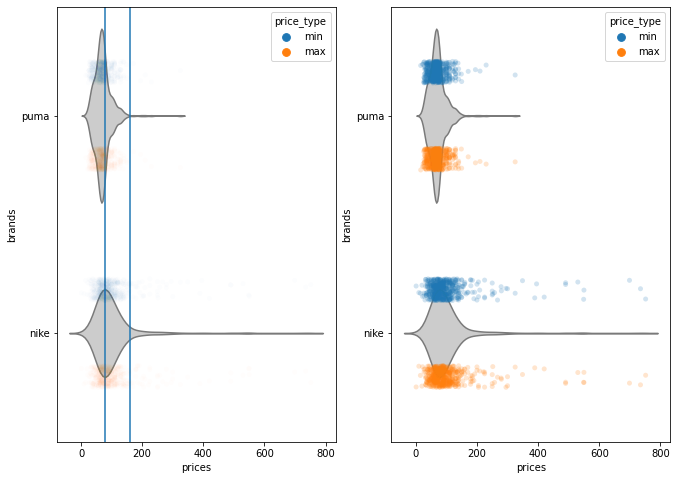

In [82]:
selected_brands = shoes_alt[(shoes_alt.brands == 'nike') | (shoes_alt.brands == 'puma')]

fig, axes = plt.subplots(1, 2, figsize=(11, 8))

# Left hand side plot with points dimmed to show
# violin plot peaks
sns.stripplot(ax= axes[0], data=selected_brands,
              x='prices', y='brands',
              jitter=True,
              hue='price_type', dodge=True,
              alpha=0.01);
sns.violinplot(ax= axes[0], data=selected_brands,
              x='prices', y='brands',
              inner=None, color='0.8');
axes[0].axvline(80);
axes[0].axvline(160);

# Right hand side plot with all points shown
sns.stripplot(ax= axes[1], data=selected_brands,
              x='prices', y='brands',
              jitter=True,
              hue='price_type', dodge=True,
              alpha=0.2);
sns.violinplot(ax= axes[1], data=selected_brands,
              x='prices', y='brands',
              inner=None, color='0.8');

# You can see that although Puma has a similar number of items listed for sale,
# the Nike brand item value range is higher. The Nike distribution peak
# is around 80, while the Puma distribution peak is below 80.
# The violinplot ends for Puma around 160, while it goes on for
# some more time after that for Nike.
# This just means that the prices listed online for Nike are higher
# than those listed for Puma.
# Surprisingly, the lower price point for Puma is higher
# than the lower price point for Nike.

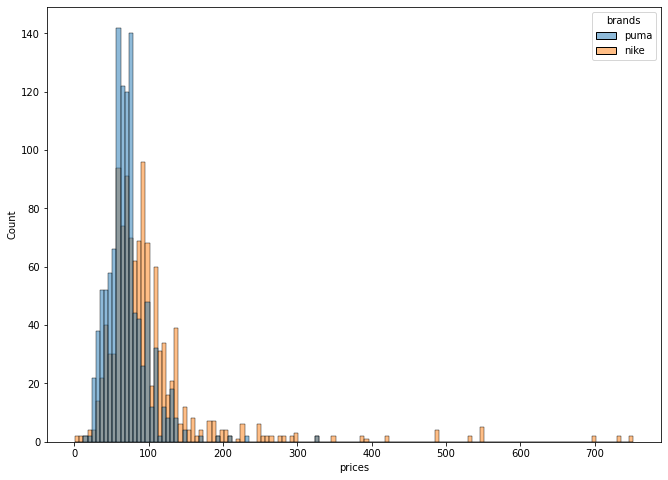

In [90]:
plt.figure(figsize=(11, 8))
sns.histplot(selected_brands, x='prices', hue='brands');
# Another way to see the same two Nike/Puma prices